This section shows how to build a supermatrix by providing minimal requirements for gene content per taxon (OTU). This approach is more suited for *small scale* analysis, because it relies on manual decisions, whereas *large scale* suprematrices are better constructed with the parameter space and data explorations tools of ReproPhylo. However, these are not addressed in this section. First, lets load our `Project` with the trimmed alignments:

In [1]:
from reprophylo import *
pj = unpickle_pj('outputs/my_project.pkpj', git=False)

DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened


## 3.8.1 Sorting out the metadata
The main decision to make when building a supermatrix is what metadata will be used to indicate that sequences of several genes belong to the same OTU in the tree. Obvious candidates would be the species name (stored as `'source_organism'` if we read a GenBank file), or sample ID, voucher specimen and so on. Often, we would be required to modify the metadata in our `Project`, in a way that will correctly reflect the relationship between sequences that emerged from the same sample.  
  
In the case of the `Tetillidae.gb` example file, sample IDs are stored either under `'source_specimen_voucher'` or `'source_isolate'`. In addition, identical voucher numbers are sometimes formatted differently for different genes.  
  
In the file `'data/Tetillida_otus_corrected.csv'`, I have unified the columns `'source_specimen_voucher'` and `'source_isolate'` in a single column called `'source_otu'` and also made sure to uniformly format all the voucher specimens:

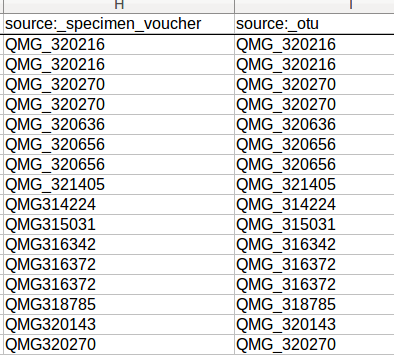

In [2]:
from IPython.display import Image
Image('images/fix_otus.png', width = 400)

Our `Project` has to be updated with the recent changes to the spreadsheet:

In [3]:
pj.correct_metadata_from_file('data/Tetillida_otus_corrected.csv')

Such fixes can also be done programmatically (see section 3.4)
## 3.8.2 Designing the supermatrix
Supermatrices are configured with objects of the class `Concatenation`. In a `Concatenation` object we can indicate the following:

1. The name of the concatenation
2. The loci it includes (here we pass `locus` objects rather than just `Locus` names)
3. The qualifier or metadata that stores the relationships among the records
4. What loci all the OTUs must have
5. Groups of loci from which each OTU must have at least one
6. Which trimmed alignment to use, if we have more than one for each locus in our `Project`

Here is an example:

In [4]:
concat = Concatenation('large_concat',                       # Any unique string
                       
                       pj.loci,                              # This is a list of Locus objects
                       
                       'source_otu',                         # The values of this qualifier 
                                                             # flag sequences the belong to the same
                                                             # sample
                                                    
                       otu_must_have_all_of=['MT-CO1'],      # All the OTUS must have a cox1 sequence
                       
                       otu_must_have_one_of=[['18s','28s']], # All the OTUs must have either 18s or 28s or both
                       
                       define_trimmed_alns=[]                # We only have one alignment per gene
                                                             # so the list is empty (default value)
                      )

If we print this `Concatenation` object we get this message:

In [5]:
print concat

Concatenation named large_concat, with loci 18s,28s,MT-CO1,
of which MT-CO1 must exist for all species
and at least one of each group of [ 18s 28s ] is represented.
Alignments with the following names:  are prefered


## 3.8.3 Building the supermatrix
Building the suprematrix has two steps. First we need to mount the `Concatenation` object onto the `Project` where it will be stored in the list `pj.concatenations`. Second, we need to construct the `MultipleSeqAlignment` object, which will be stored in the `pj.trimmed_alignments` dictionary, under the key `'large_concat'` in this case:

In [6]:
pj.add_concatenation(concat)
pj.make_concatenation_alignments()

Concatenation large_concat will have the following data
OTU                           18s                 28s                 MT-CO1              
NIWA_28507                    JX177975.1_f0  JX177943.1_f0  JX177896.1_f0  
ZMBN_85230                                   HM592765.1_f0  HM592717.1_f0  
NIWA_28910                    JX177982.1_f0                 JX177865.1_f0  
VM_14754                      JX177986.1_f0  JX177960.1_f0  HM032751.1_f0  
ZMBN_85239                    JX177987.1_f0  JX177959.1_f0  HM592669.1_f0  
ZMBN_81789                                   HM592753.1_f0  HM592667.1_f0  
QMG_315031                    JX177974.1_f0  JX177942.1_f0  HM032749.2_f0  
NIWA_28617                    JX177980.1_f0                 JX177912.1_f0  
RMNH_POR_3206                                JX177925.1_f0  JX177892.1_f0  
UFBA_2021_POR                                JX177921.1_f0  JX177907.1_f0  
NIWA_28586                    JX177978.1_f0  JX177953.1_f0  JX177918.1_f0  
QMG_320270       

In [8]:
pickle_pj(pj, 'outputs/my_project.pkpj')

'outputs/my_project.pkpj'

Now that this supermatrix is stored as a trimmed alignment in the `pj.trimmed_alignments` dictionary, we can write it to a file or fetch the `MultipleSeqAlignment` object, as shown in section 3.7.
## 3.8.4 Quick reference

In [ ]:
# Design a supermatrix
concat = Concatenation('concat_name', loci_list, 'otu_qualifier' **kwargs)

# Add it to a project
pj.add_concatenation(concat)

# Build supermatrices based on the Concatenation
# objects in pj.concatenations
pj.make_concatenation_alignments()